In [1]:
###Reference###
#https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(456, 374, 3)


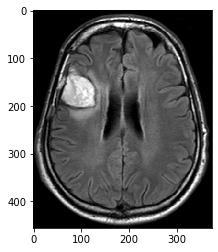

In [2]:
pic = plt.imread('brain_tumor_dataset/yes/Y7.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

It’s a 3-dimensional image of shape (192, 263, 3). For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels). In our example, this will be (192*263, 3).

In [3]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(170544, 3)

In [10]:
#Apply K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(pic_n) #change n_clusters
pic2show = kmeans.cluster_centers_[kmeans.labels_]

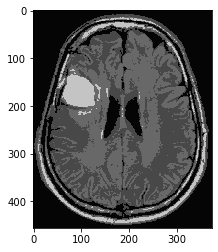

In [11]:
#bring back the clusters to their original shape,
#i.e. 3-dimensional image, and plot the results.
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

<h1>Footnotes</h1><br>
k-means works really well when we have a small dataset. It can segment the objects in the image and give impressive results. But the algorithm hits a roadblock when applied on a large dataset (more number of images).

It looks at all the samples at every iteration, so the time taken is too high. Hence, it’s also too expensive to implement. And since k-means is a distance-based algorithm, it is only applicable to convex datasets and is not suitable for clustering non-convex clusters.